# Building a Shallow Neural Network with `keras`

Now, we'll finally get the chance to use `keras` for it's intended purpose - to build neural networks. In doing so, we'll again see how easy it is to use `keras`. 

## Computational Graphs for our Shallow Neural Network 

For reference, the visuals of the forward and backward propagation steps:

### Forward Propagation

<img src="../imgs/custom/shallow_nonlinear_connect_forprop.png" width=450 \>

### Backward Propagation

<img src="../imgs/custom/shallow_nonlinear_connect_backprop.png" width=600 \>

### Building a Shallow Neural Network with `keras`

With `keras`, we won't as explicitly specify the forward and backward propagation steps as we did with `numpy`, `theano`, and `tensorflow`. Instead, we'll specify different layers to build into our neural network, and how to connect those layers (e.g. what they receive as input). Past that, `keras` will handle the reset. 

Recall that `keras` can be run on top of either `tensorflow` or `theano`, which means that under the hood of our shallow neural network below, a similar version of the code that we wrote in our `theano` or `tensorflow` implementation is being run. By default, `keras` runs on `theano`, but by [adjusting our keras configuration file](http://keras.io/backend/#switching-from-one-backend-to-another), we can easily change that. For now, though, we'll just run it on `theano`. 

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input
from keras.layers.core import Dense
from keras.models import Model
from keras.optimizers import SGD
from datasets.general import gen_trigonometric, gen_powx
from utils.plotting import plot_func
%matplotlib inline

Using Theano backend.


In [2]:
def get_keras_model(hlayer_size): 
    learning_rate = 0.01
    # 1. Specify a placeholder for the inputs (this is effectively Layer 1) 
    xs = Input(shape=(1,))
    # 2. Define the equation that generates predictions.
    layer = Dense(hlayer_size, activation='sigmoid')(xs) # Layer 2 (hidden layer)
    ys = Dense(1, activation='linear')(layer) # Layer 3 (output layer)

    # 3. Define a `Model` object that will be used to train/learn the coefficients. 
    shallow_network = Model(input=xs, output=ys)
    
    # 4. Define the optimizer and loss function used to train/learn the coefficients. 
    sgd = SGD(learning_rate)
    
    # 5. Compile the model (basically, build up the backpropagation steps)
    shallow_network.compile(loss='mean_squared_error', optimizer=sgd)
    
    return shallow_network

Our `get_keras_model` function returns back what our `get_theano_graph` (notebook 4d) and `get_tensorflow_graph` (notebook 4e) functions returned - the computations necessary to perform forward and backward propagation over a shallow neural network. Note that it takes much less code and is much easier to specify, which is part of what makes `keras` such a great framework to use for building neural networks. 

In terms of the network itself, we can see that our forward propagation steps are defined in steps `1` and `2`: 

 * Step `1` defines Layer 1 (the input layer), and specifies a placeholder variable that will later be replaced with real data. To specify the placeholder, we have to provide the dimensionality of the input, which in our case is 1 since we have a single variable. 
 * Step `2` defines Layer 2 (the hidden layer) and Layer 3 (the output layer). To specify the hidden layer, we use the same `Dense` class that we use in the output layer. The `Dense` here denotes that the all nodes in that layer will be connected to all nodes in the prior layer (e.g. they will be **fully-connected**). The first argument to the `Dense` class specifies how many nodes to place in that layer, and the `activation` argument specifies what activation will be applied to the weighted sums of the inputs to all nodes in that layer. Note that in specifying the output layer, the number of nodes must match the dimensionality of the output that will be passed in during the `fit` step. 
 
Steps `4` and `5` specify the backpropagation steps: 

 * Step `4` specifies exactly how to perform our gradient descent updates. Here, we'll use what we've used in all of our prior implementations of a shallow neural network - gradient descent. As we'll see in a later mini-book, there are a number of more complicated flavors of gradient descent that we also have the option to use.
 * Step `5` tells `keras` to calculate the update rules for our coefficients, defining each of the steps necessary for doing so. Here, we have to specify a `loss` as well as an `optimizer`. As discussed above, the `optimizer` specifies how to perform our gradient descent updates. The `loss` function specifies how we calculate the error, which here is `mean_squared_error`. After defining both a `loss` and `optimizer`, `keras` has all of the pieces it needs to calculate the update rules for our coefficients, and to add those update steps into the graph that it will later run through. 
 
Step `3` builds a model object that we can later use to learn our coefficients. To instantiate it, we have to specify `input` as well as `output`. In order to finish building it for later use, we have to run `compile` on it like we did in step `5`. 

We'll now run our `keras` model and learn the weights and biases of a shallow neural network, again as it tries to learn the functions <img src="../imgs/equations/y_sinx.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=85\>
and 
<img src="../imgs/equations/y_x4.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0; padding-bottom:0;" width=55\>. 

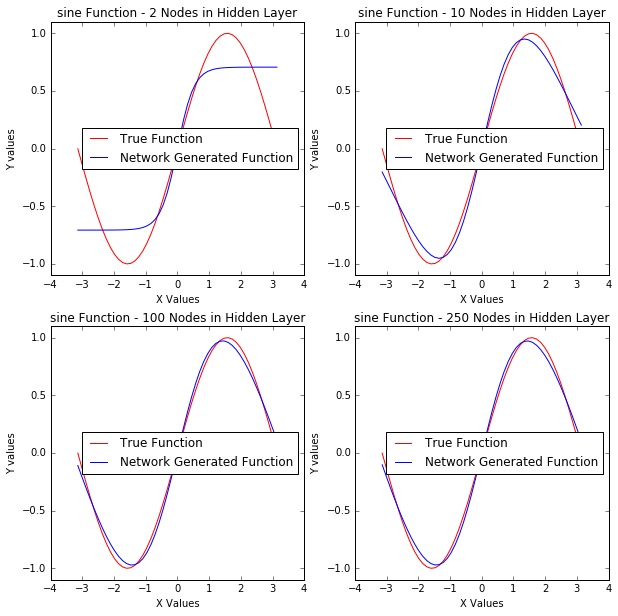

In [3]:
np.random.seed(317) # set seed for reproducibility 
# Randomly generate some fake data that follows a y = sin(x) relationship.
n_obs = 50
xs, ys = gen_trigonometric(n_obs=n_obs, func='sine')

# Fit four different sized networks, plotting the true function and 
# network generated function (e.g. it's predictions) for each network
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
hlayer_sizes = (2, 10, 100, 250)
for ax, hlayer_size in zip(axes.flatten(), hlayer_sizes):
    # Get the `keras` network. 
    shallow_network = get_keras_model(hlayer_size)
    
    # Learn the coefficients (perform iterations of forward and backward propagation)
    shallow_network.fit(xs, ys, nb_epoch=50000, verbose=0, batch_size=n_obs)
        
    # Obtain final predictions after training.
    yhats = shallow_network.predict(xs)
    
    # Plot the true function as well as the function predicted by the model. 
    plot_func(xs=xs, y_true=ys, y_pred=yhats, n_nodes=hlayer_size, func='sine', ax=ax)

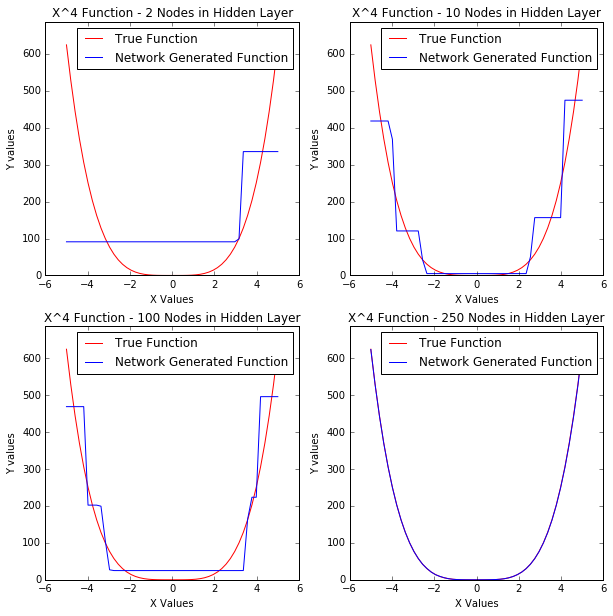

In [4]:
np.random.seed(317) # set seed for reproducibility 
# Randomly generate some fake data that follows a y = sin(x) relationship.
n_obs = 50
xs, ys = gen_powx(n_obs=n_obs, pow_x=4)

# Fit four different sized networks, plotting the true function and 
# network generated function (e.g. it's predictions) for each network
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
hlayer_sizes = (2, 10, 100, 250)
for ax, hlayer_size in zip(axes.flatten(), hlayer_sizes):
    # Get the `keras` network. 
    shallow_network = get_keras_model(hlayer_size)
    
    # Learn the coefficients (perform iterations of forward and backward propagation)
    shallow_network.fit(xs, ys, nb_epoch=50000, verbose=0, batch_size=n_obs)
        
    # Obtain final predictions after training.
    yhats = shallow_network.predict(xs)
    
    # Plot the true function as well as the function predicted by the model. 
    plot_func(xs=xs, y_true=ys, y_pred=yhats, n_nodes=hlayer_size, func='X^4', ax=ax)

As with our other `keras` models, runnning it is fairly straightforward. We simply call `fit` on it, making sure to pass in our inputs and outputs (`xs` and `ys`) and specify how many iterations of forward and backward propagation to perform over our dataset (this is the `nb_epoch` argument). We also specify the `batch_size` to control how many observations the model looks at in each individual foward/backward propagation step (right now we want it to just look at all of them). We'll detail these parameters more later as we dive into neural networks. 

Upon running it, we can see that the shallow neural network that we built is able to learn the mathematical functions, and we again see that more nodes allows it to have more representational power and more accurately learn each mathematical function. 

In the next mini-book, we'll transition from shallow neural networks to **deep** neural networks that have more than one hidden layer. In doing so, we'll build up a small, extensible set of classes that we can use to build a **deep** neural network, and start working towards solving real world regression and classification tasks. 